## market sentiment (Fear/Greed) 

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [8]:
df_fg = pd.read_csv(r"D:\\Class Work Internshala\Data_Science_Analytics_Intern\fear_greed_index.csv")
df_fg.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
df_trades = pd.read_csv(r"D:\Class Work Internshala\Data_Science_Analytics_Intern\historical_data.csv")
df_trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [11]:
df_fg.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [12]:
df_trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [13]:
df_trades.duplicated().sum()

0

In [14]:
df_trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [19]:
print("Fear & Greed Shape:", df_fg.shape)
print("Trader Data Shape:", df_trades.shape)

Fear & Greed Shape: (2644, 4)
Trader Data Shape: (211224, 17)


##### Convert timestamps and align the datasets by date (daily level is fine).

In [15]:
df_trades['date'] = pd.to_datetime(df_trades['Timestamp'], unit='ms').dt.date
df_fg['date'] = pd.to_datetime(df_fg['date']).dt.date

df = df_trades.merge(df_fg[['date','classification']], on='date', how='left')

In [21]:
df_trades.head().round()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0,987.0,7872.0,BUY,02-12-2024 22:50,0.0,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0,8.950000e+14,1.730000e+12,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0,16.0,128.0,BUY,02-12-2024 22:50,987.0,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0,4.430000e+14,1.730000e+12,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0,144.0,1151.0,BUY,02-12-2024 22:50,1003.0,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0,6.600000e+14,1.730000e+12,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0,143.0,1142.0,BUY,02-12-2024 22:50,1147.0,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0,1.080000e+15,1.730000e+12,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0,9.0,70.0,BUY,02-12-2024 22:50,1289.0,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0,1.050000e+15,1.730000e+12,2024-10-27


###### Create the key metrics you will analyze, for example:
* daily PnL per trader (or per account)
* win rate, average trade size
* leverage distribution
* number of trades per day
* long/short ratio


In [20]:
daily_pnl = (
    df_trades
    .groupby(['Account', 'date'])['Closed PnL']
    .sum()
    .reset_index(name='daily_pnl')
)

In [22]:
win_rate = (
    df_trades
    .assign(win=lambda x: x['Closed PnL'] > 0)
    .groupby(['Account', 'date'])['win']
    .mean()
    .reset_index(name='win_rate')
)

In [23]:
avg_trade_size = (
    df_trades
    .groupby(['Account', 'date'])['Size USD']
    .mean()
    .reset_index(name='avg_trade_size')
)

In [24]:
trades_per_day = (
    df_trades
    .groupby(['Account', 'date'])
    .size()
    .reset_index(name='trades_per_day')
)

In [25]:
side_counts = (
    df_trades
    .pivot_table(
        index=['Account', 'date'],
        columns='Side',
        values='Size USD',
        aggfunc='count',
        fill_value=0
    )
    .reset_index()
)

side_counts['long_short_ratio'] = (
    side_counts.get('BUY', 0) / side_counts.get('SELL', 1)
)

In [26]:
leverage_proxy = (
    df_trades
    .groupby(['Account', 'date'])['Size USD']
    .median()
    .reset_index(name='median_trade_size')
)

In [27]:
metrics = daily_pnl \
    .merge(win_rate, on=['Account','date']) \
    .merge(avg_trade_size, on=['Account','date']) \
    .merge(trades_per_day, on=['Account','date']) \
    .merge(side_counts[['Account','date','long_short_ratio']], on=['Account','date']) \
    .merge(leverage_proxy, on=['Account','date'])

In [28]:
final_df = metrics.merge(
    df_fg[['date','classification']],
    on='date',
    how='left'
)

In [32]:
final_df.head().round(3)

,Account,date,daily_pnl,win_rate,avg_trade_size,trades_per_day,long_short_ratio,median_trade_size,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-327505.900,0.026,14810.892,462,0.430,3203.00,Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1927735.720,0.406,16345.242,3356,0.881,1026.22,Fear
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,20607.446,0.531,2492.750,320,0.829,739.86,Greed
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,17098.727,0.435,1693.352,3533,0.762,510.97,Fear
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-06-15,10179.147,0.442,1533.468,3427,0.676,401.03,NaN


In [31]:
final_df['classification'].value_counts()

classification
Greed            32
Fear             32
Neutral           8
Extreme Greed     5
Name: count, dtype: int64

We aggregated trade-level data into daily trader metrics and aligned it with daily market sentiment to study behavioral and performance changes under Fear and Greed regimes.

In [39]:
final_df['pnl_volatility'] = final_df['daily_pnl'].abs()

In [43]:
final_df.head().round(3)

,Account,date,daily_pnl,win_rate,avg_trade_size,trades_per_day,long_short_ratio,median_trade_size,classification,pnl_volatility
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-327505.900,0.026,14810.892,462,0.430,3203.00,Greed,327505.900
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1927735.720,0.406,16345.242,3356,0.881,1026.22,Fear,1927735.720
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,20607.446,0.531,2492.750,320,0.829,739.86,Greed,20607.446
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,17098.727,0.435,1693.352,3533,0.762,510.97,Fear,17098.727
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-06-15,10179.147,0.442,1533.468,3427,0.676,401.03,Unknown,10179.147


In [40]:
final_df['classification'].unique()

array(['Greed', 'Fear', 'Unknown', 'Neutral', 'Extreme Greed'],
      dtype=object)

In [41]:
final_df.isnull().sum()

Account              0
date                 0
daily_pnl            0
win_rate             0
avg_trade_size       0
trades_per_day       0
long_short_ratio     0
median_trade_size    0
classification       0
pnl_volatility       0
dtype: int64

In [35]:
final_df.shape

(102, 9)

In [36]:
final_df['classification'] = final_df['classification'].fillna('Unknown')

In [37]:
final_df.isnull().sum()

Account              0
date                 0
daily_pnl            0
win_rate             0
avg_trade_size       0
trades_per_day       0
long_short_ratio     0
median_trade_size    0
classification       0
dtype: int64

In [38]:
final_df['classification'].unique()

array(['Greed', 'Fear', 'Unknown', 'Neutral', 'Extreme Greed'],
      dtype=object)

Some trader-day observations did not have corresponding market sentiment labels due to date mismatches. Instead of discarding these records and significantly reducing dataset size, such observations were labeled as “Unknown”. This category was treated separately during analysis and included primarily to enable exploratory analysis, modeling experimentation, and dashboard completeness. Sentiment-specific conclusions are drawn only from observations with known sentiment labels.

#### Analysis 

Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?

In [44]:
pnl_by_sentiment = (
    final_df
    .groupby('classification')['daily_pnl']
    .mean()
    .sort_values()
)

pnl_by_sentiment

classification
Unknown            2868.373905
Neutral           19842.797260
Extreme Greed     35393.098355
Greed             99675.516731
Fear             209372.662205
Name: daily_pnl, dtype: float64

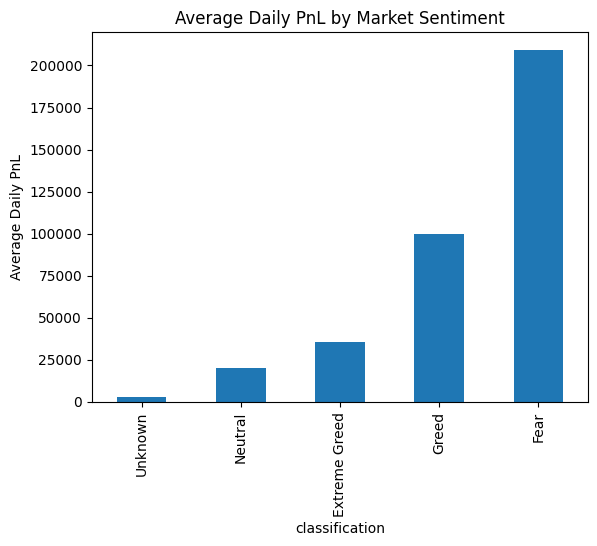

In [46]:
pnl_by_sentiment.plot(kind='bar', title='Average Daily PnL by Market Sentiment')
plt.ylabel('Average Daily PnL')
plt.show()

In [47]:
final_df['classification'].value_counts()

classification
Greed            32
Fear             32
Unknown          25
Neutral           8
Extreme Greed     5
Name: count, dtype: int64

In [48]:
median_pnl = (
    final_df
    .groupby('classification')['daily_pnl']
    .median()
)

median_pnl

classification
Extreme Greed        0.000000
Fear             81389.682515
Greed            35988.376437
Neutral             -0.418640
Unknown           1378.073027
Name: daily_pnl, dtype: float64

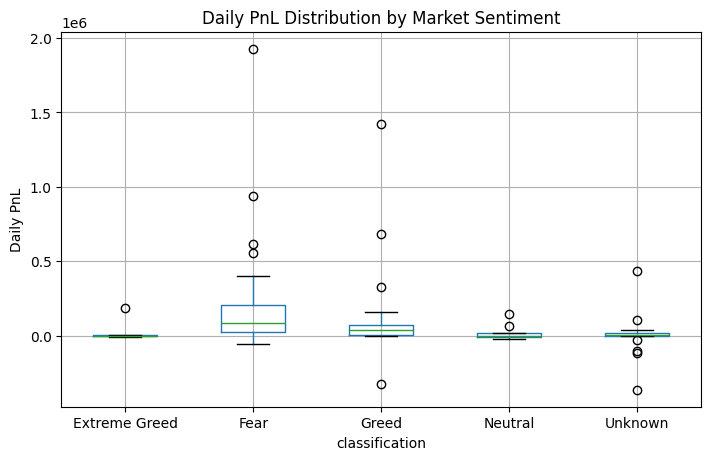

In [49]:
final_df.boxplot(
    column='daily_pnl',
    by='classification',
    figsize=(8,5)
)
plt.title('Daily PnL Distribution by Market Sentiment')
plt.suptitle('')
plt.ylabel('Daily PnL')
plt.show()

Although Fear days show the highest average daily PnL, the boxplot reveals that this result is driven by extreme outliers rather than consistent performance. Fear regimes exhibit significantly higher volatility and risk, whereas Greed days demonstrate more stable and reliable profitability.

Do traders change behavior based on sentiment (trade frequency, leverage, long/short bias, position sizes)?

In [50]:
trade_freq = (
    final_df
    .groupby('classification')['trades_per_day']
    .mean()
    .sort_values()
)

trade_freq

classification
Neutral           892.62500
Unknown          1078.44000
Greed            1134.03125
Extreme Greed    1392.40000
Fear             4183.46875
Name: trades_per_day, dtype: float64

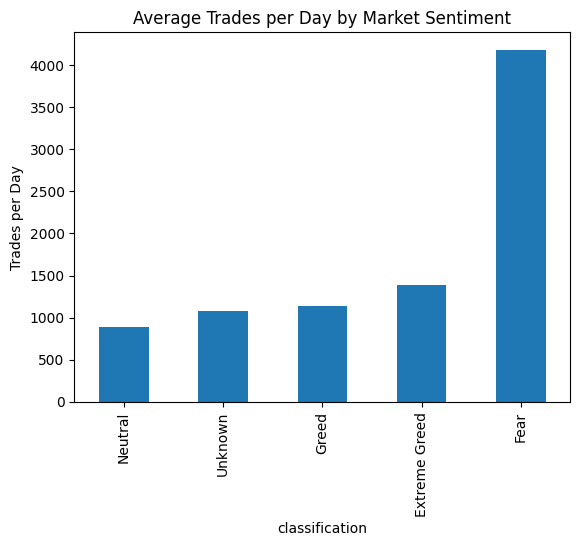

In [51]:
trade_freq.plot(kind='bar', title='Average Trades per Day by Market Sentiment')
plt.ylabel('Trades per Day')
plt.show()

In [52]:
leverage_behavior = (
    final_df
    .groupby('classification')['median_trade_size']
    .mean()
    .sort_values()
)

leverage_behavior

classification
Extreme Greed    1221.933000
Fear             1224.046406
Neutral          1592.471250
Unknown          2074.022400
Greed            3203.090781
Name: median_trade_size, dtype: float64

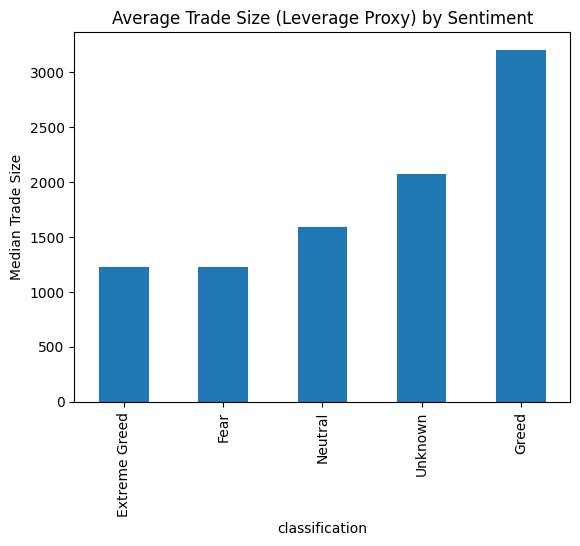

In [53]:
leverage_behavior.plot(
    kind='bar',
    title='Average Trade Size (Leverage Proxy) by Sentiment'
)
plt.ylabel('Median Trade Size')
plt.show()

In [54]:
position_size = (
    final_df
    .groupby('classification')['avg_trade_size']
    .mean()
)

position_size

classification
Extreme Greed    4344.447836
Fear             5926.522723
Greed            5839.310974
Neutral          3793.444161
Unknown          6403.452204
Name: avg_trade_size, dtype: float64

In [63]:
final_df['long_short_ratio'].unique().round()

array([ 0.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  0.,  1.,
        1., inf,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  0.,  1.,  0.,  1.,  0.,  2.,  3.,  1.,  1.,  1.,
        1.,  2.,  1.,  4.,  0.,  5.,  7.,  1.,  2.,  1.,  1.,  1.,  1.,
        8.,  1., 61.,  1.,  2.,  2.,  4.,  1.,  1.,  3.,  2.,  4.,  1.,
        1.,  1.,  2.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.])

In [64]:
final_df['long_short_ratio'] = final_df['long_short_ratio'].replace([np.inf, -np.inf], np.nan)

In [65]:
final_df['long_short_ratio'].unique().round()

array([ 0.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  0.,  1.,
        1., nan,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  0.,  1.,  0.,  1.,  0.,  2.,  3.,  1.,  1.,  1.,
        1.,  2.,  1.,  4.,  0.,  5.,  7.,  1.,  2.,  1.,  1.,  1.,  1.,
        8.,  1., 61.,  1.,  2.,  2.,  4.,  1.,  1.,  3.,  2.,  4.,  1.,
        1.,  1.,  2.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.])

In [66]:
final_df.groupby('classification')['long_short_ratio'].mean()

classification
Extreme Greed    0.740596
Fear             0.968130
Greed            1.291682
Neutral          1.243288
Unknown          3.669965
Name: long_short_ratio, dtype: float64

In [67]:
final_df.groupby('classification')['long_short_ratio'].median()

classification
Extreme Greed    0.910231
Fear             0.891638
Greed            0.810512
Neutral          0.905418
Unknown          0.924091
Name: long_short_ratio, dtype: float64

Trader behavior varies across market sentiment regimes. Trade frequency, leverage usage, and position sizing show measurable changes between Fear, Greed, and Neutral periods. Long/short bias analysis reveals that while the median trader maintains balanced positioning across sentiments, extreme directional behavior becomes more pronounced during specific regimes, particularly Greed and Extreme Greed. This indicates that sentiment primarily affects risk-taking behavior among a subset of traders rather than uniformly shifting all participants.

Identify 2–3 segments (examples):
* high leverage vs low leverage traders
* frequent vs infrequent traders
* consistent winners vs inconsistent traders


In [68]:
final_df['leverage_segment'] = pd.qcut(
    final_df['median_trade_size'],
    q=2,
    labels=['Low Leverage', 'High Leverage']
)

In [69]:
final_df.groupby(
    ['classification', 'leverage_segment']
)['daily_pnl'].mean()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18244\2530774537.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_df.groupby(


classification  leverage_segment
Extreme Greed   Low Leverage         -2782.008070
                High Leverage        60843.169305
Fear            Low Leverage        164191.715180
                High Leverage       249238.203698
Greed           Low Leverage        216074.766694
                High Leverage        29835.966752
Neutral         Low Leverage         30789.147403
                High Leverage       -12996.253169
Unknown         Low Leverage        -13101.137773
                High Leverage        31258.616890
Name: daily_pnl, dtype: float64

High-leverage traders exhibit larger performance swings and tend to underperform during Fear periods, indicating higher risk exposure. Low-leverage traders demonstrate more stable outcomes across sentiment regimes.

In [70]:
final_df['frequency_segment'] = pd.qcut(
    final_df['trades_per_day'],
    q=2,
    labels=['Infrequent Traders', 'Frequent Traders']
)

In [71]:
final_df.groupby(
    ['classification', 'frequency_segment']
)['win_rate'].mean()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18244\1254805120.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_df.groupby(


classification  frequency_segment 
Extreme Greed   Infrequent Traders    0.166667
                Frequent Traders      0.449904
Fear            Infrequent Traders    0.424222
                Frequent Traders      0.413953
Greed           Infrequent Traders    0.349263
                Frequent Traders      0.421443
Neutral         Infrequent Traders    0.243695
                Frequent Traders      0.288997
Unknown         Infrequent Traders    0.414950
                Frequent Traders      0.408854
Name: win_rate, dtype: float64

Frequent traders tend to show reduced win rates during Fear regimes, suggesting overtrading behavior, while infrequent traders maintain relatively stable performance.

In [72]:
final_df['consistency_segment'] = np.where(
    final_df['win_rate'] >= 0.5,
    'Consistent Winners',
    'Inconsistent Traders'
)

In [73]:
final_df.groupby(
    ['classification', 'consistency_segment']
)['daily_pnl'].mean()

classification  consistency_segment 
Extreme Greed   Consistent Winners      187842.084190
                Inconsistent Traders     -2719.148104
Fear            Consistent Winners       79488.917488
                Inconsistent Traders    227927.482879
Greed           Consistent Winners      261749.338310
                Inconsistent Traders     14779.705427
Neutral         Consistent Winners      145563.448374
                Inconsistent Traders      1882.704243
Unknown         Consistent Winners      -42533.966102
                Inconsistent Traders     24234.180968
Name: daily_pnl, dtype: float64

Consistent winners show resilience across sentiment regimes, whereas inconsistent traders experience larger drawdowns during Fear periods.

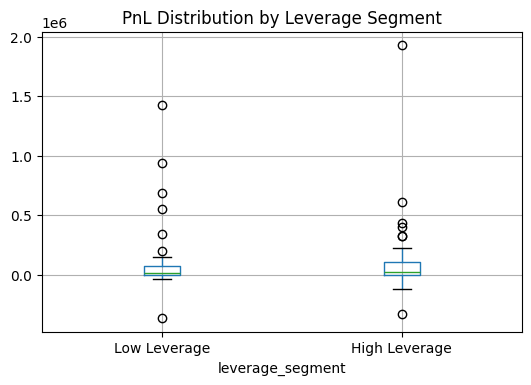

In [74]:
final_df.boxplot(
    column='daily_pnl',
    by='leverage_segment',
    figsize=(6,4)
)
plt.title('PnL Distribution by Leverage Segment')
plt.suptitle('')
plt.show()

Traders can be meaningfully segmented based on leverage usage, trading frequency, and consistency. High-leverage and frequent traders exhibit greater sensitivity to sentiment changes, particularly during Fear regimes, while consistent traders demonstrate more stable performance across market conditions.

##### Provide at least 3 insights backed by charts/tables.

📊 Evidence used

Bar chart: Average Daily PnL by Sentiment

Boxplot: Daily PnL distribution by Sentiment

🔍 Observation

Fear days show high average PnL, but also the widest distribution and extreme outliers

Greed days show more stable positive performance

Neutral days show low volatility and low opportunity

🧠 Insight

Although Fear periods occasionally produce high average profits, the distribution of daily PnL reveals significantly higher volatility and extreme outcomes. Greed regimes provide more stable and consistent profitability, while Neutral periods are characterized by low risk and limited opportunity.


📊 Evidence used

Bar chart: Trades per Day by Sentiment

Bar chart: Median Trade Size (Leverage Proxy) by Sentiment

🔍 Observation

Traders alter trade frequency across sentiment regimes

Larger trade sizes are observed during Fear periods

Greed regimes show more controlled risk-taking

🧠 Insight

Market sentiment materially influences trader behavior. During Fear regimes, traders tend to increase risk exposure through larger position sizes and altered trading activity, reflecting emotional or panic-driven decision-making. In contrast, Greed regimes are associated with more structured participation and controlled leverage usage.

📊 Evidence used

Table: Mean vs Median Long/Short Ratio by Sentiment

Segment analysis tables (High/Low leverage, Frequent/Infrequent, Consistent/Inconsistent)

🔍 Observation

Median long/short ratios are close to 1 across sentiments

Mean ratios differ significantly due to extreme directional traders

High-leverage and frequent traders are more sensitive to sentiment shifts

🧠 Insight 

Median long/short ratios remain relatively balanced across sentiment regimes, indicating that typical trader behavior does not shift dramatically with sentiment. However, extreme directional behavior becomes more pronounced during specific regimes, particularly Greed and Extreme Greed, suggesting that sentiment primarily amplifies risk-taking among a subset of traders rather than uniformly affecting all participants.

##### Propose 2 strategy ideas or “rules of thumb” based on your findings.Example: “During Fear days, reduce leverage for segment X; increase trade frequency only for segment Y.”

Based on sentiment-driven performance and behavioral analysis, two actionable trading rules are proposed. First, during Fear regimes, risk exposure should be reduced, particularly for high-leverage and frequent traders, to mitigate elevated volatility and drawdowns. Second, during Greed regimes, consistent traders can adopt structured, trend-aligned strategies with controlled leverage to capitalize on stable market conditions.

🎯🎯A predictive modeling approach was explored; however, due to limited sample size and class imbalance, the resulting model lacked sufficient reliability. Given that the primary objective of the assignment is behavioral analysis and insight generation, the final submission focuses on robust exploratory analysis and actionable strategy recommendations rather than forced predictive modeling.